In [1]:
from ellipse_rcnn.pl import EllipseRCNNModule
from ellipse_rcnn.data.industry import IndustryEllipseDataset
from ellipse_rcnn.utils.viz import plot_ellipses, plot_bboxes
import matplotlib.pyplot as plt
import os

In [2]:
image_dir = r'D:\Exercises\HIWI\EllipDet-master\Industrial\images'
annotations_dir = r'D:\Exercises\HIWI\EllipDet-master\Industrial\gt'
model_path = r"D:\Exercises\HIWI\ellipse-rcnn-main\checkpoints\loss=0.14624-e=38.ckpt"
image_files = sorted([
            os.path.join(image_dir, f)
            for f in os.listdir(image_dir)
            if f.endswith(".jpg") or f.endswith(".bmp")  # Include both .jpg and .bmp files
        ])
annotation_files = sorted([
        os.path.join(annotations_dir, f)
        for f in os.listdir(annotations_dir)
        if f.endswith(".txt")
    ])
ds = IndustryEllipseDataset(
                image_files,
                annotation_files,
            )
image,target = ds[46]

Processing sample 46
Loading image: D:\Exercises\HIWI\EllipDet-master\Industrial\images\Image_3.bmp
original size: 1024 x 856
target size_1: 640 x 640


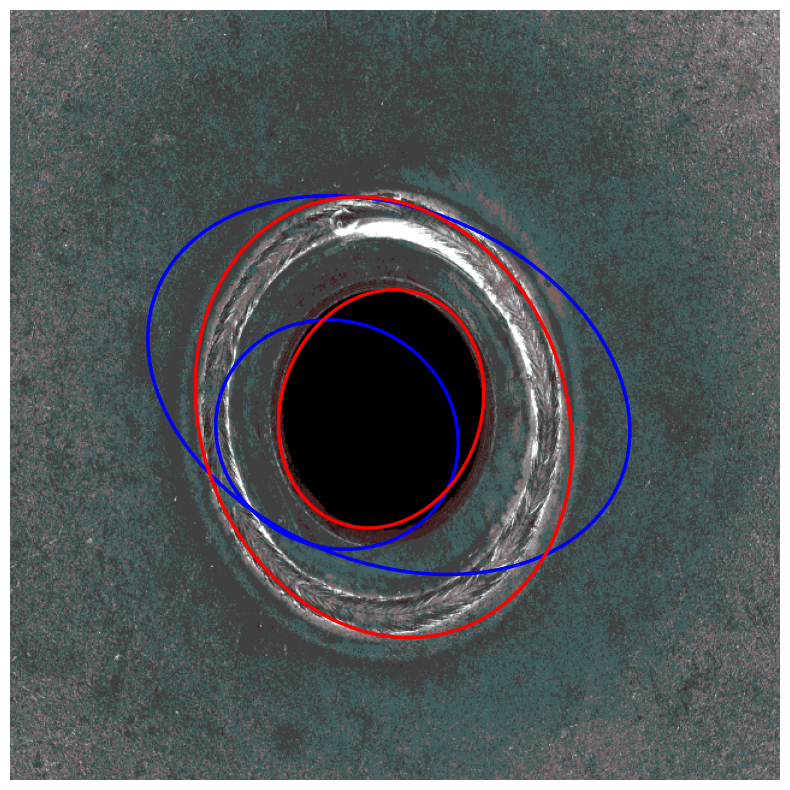

In [3]:
model = EllipseRCNNModule.load_from_checkpoint(model_path)
model.eval().cpu()
pred = model(image.unsqueeze(0))
score_mask = pred[0]["scores"] > 0.6
if not len(pred[0]["boxes"][score_mask]) > 0:
    print(f"No predictions detected for sampled image {idx + 1}.")
fig, ax = plt.subplots(figsize=(10, 10)) 

ax.set_aspect("equal")
ax.axis("off")
image = image.permute(1, 2, 0) if image.ndim == 3 else image
ax.imshow(image, cmap="grey")

ellipses = pred[0]["ellipse_params"][score_mask].view(-1, 5)
boxes = pred[0]["boxes"][score_mask].view(-1, 4)

# Plot ellipses
plot_ellipses(
    ellipses,
    ax=ax,
    plot_centers=False, # Whehter to plot ellipse centers
    rim_color="b",
    alpha=1,
)
plot_ellipses(
            target["ellipse_params"],
            ax=ax,
            plot_centers=False,
            rim_color="r",
            alpha=1,
        )